# Singapore Property Price Data Analysis

### Importing necessary libraries

In [34]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
#import dataset
df = pd.read_csv(r'Flat prices.csv') 

# Exploratory Data Analysis

In [37]:
#top 5 rows
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [38]:
#details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92270 entries, 0 to 92269
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                92270 non-null  object 
 1   town                 92270 non-null  object 
 2   flat_type            92270 non-null  object 
 3   block                92270 non-null  object 
 4   street_name          92270 non-null  object 
 5   storey_range         92270 non-null  object 
 6   floor_area_sqm       92270 non-null  float64
 7   flat_model           92270 non-null  object 
 8   lease_commence_date  92270 non-null  int64  
 9   remaining_lease      92270 non-null  object 
 10  resale_price         92270 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 7.7+ MB


In [39]:
#row-col
df.shape

(92270, 11)

In [40]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [41]:
#Null values
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [42]:
#stats
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,92270.000000,92270.000000,9.227000e+04
mean,97.768362,1994.444175,4.448869e+05
std,24.263575,13.064066,1.548243e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1984.000000,3.330000e+05
50%,95.000000,1995.000000,4.150000e+05
75%,113.000000,2003.000000,5.200000e+05
max,249.000000,2019.000000,1.258000e+06


In [43]:
# creatring year col
# df['year'] = df['month'].str.split('-').str[0]
df['year'] = df['month'].str[:4]
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017


In [75]:
# making the year col numeric
df['year']=df['year'].astype(int)
df['year'].dtypes

dtype('int32')

In [45]:
df['month_new']=df['month'].str[5:]
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,month_new
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,01
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,01
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,01
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,01
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,01


In [46]:
df['month_new']=df['month_new'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92270 entries, 0 to 92269
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                92270 non-null  object 
 1   town                 92270 non-null  object 
 2   flat_type            92270 non-null  object 
 3   block                92270 non-null  object 
 4   street_name          92270 non-null  object 
 5   storey_range         92270 non-null  object 
 6   floor_area_sqm       92270 non-null  float64
 7   flat_model           92270 non-null  object 
 8   lease_commence_date  92270 non-null  int64  
 9   remaining_lease      92270 non-null  object 
 10  resale_price         92270 non-null  float64
 11  year                 92270 non-null  int32  
 12  month_new            92270 non-null  int32  
dtypes: float64(2), int32(2), int64(1), object(8)
memory usage: 8.4+ MB


In [47]:
df['month_name']=df['month_new'].map({ 1:'jan',
                                    2:'feb',
                                    3:'march',
                                    4:'april',
                                    5:'may',
                                    6:'jun',
                                    7:'july',
                                    8:'august',
                                    9:'sep',
                                    10:'oct',
                                    11:'nov',
                                    12:'dec'
                                   })

In [48]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,month_new,month_name
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,1,jan
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,1,jan
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,1,jan
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,1,jan
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,1,jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92265,2021-02,YISHUN,EXECUTIVE,406,YISHUN AVE 6,10 TO 12,148.0,Maisonette,1988,66 years 08 months,655000.0,2021,2,feb
92266,2021-02,YISHUN,EXECUTIVE,355,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,66 years 10 months,650000.0,2021,2,feb
92267,2021-02,YISHUN,EXECUTIVE,364,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,66 years 02 months,607000.0,2021,2,feb
92268,2021-02,YISHUN,EXECUTIVE,828,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,66 years,670000.0,2021,2,feb


In [49]:
# deleting the old month col
df.drop(['month','month_new'], axis =1 ,inplace = True)

In [50]:
df

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,month_name
0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,jan
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,jan
2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,jan
3,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,jan
4,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,jan
...,...,...,...,...,...,...,...,...,...,...,...,...
92265,YISHUN,EXECUTIVE,406,YISHUN AVE 6,10 TO 12,148.0,Maisonette,1988,66 years 08 months,655000.0,2021,feb
92266,YISHUN,EXECUTIVE,355,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,66 years 10 months,650000.0,2021,feb
92267,YISHUN,EXECUTIVE,364,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,66 years 02 months,607000.0,2021,feb
92268,YISHUN,EXECUTIVE,828,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,66 years,670000.0,2021,feb


In [54]:
sns.set()

# Top 10 town with most no of properties

In [55]:
df1 = df['town'].value_counts().sort_values(ascending = False).head(10)
df1

town
SENGKANG         7577
JURONG WEST      6647
WOODLANDS        6607
YISHUN           6281
PUNGGOL          6209
TAMPINES         6123
BEDOK            5017
HOUGANG          4457
ANG MO KIO       4091
CHOA CHU KANG    3817
Name: count, dtype: int64

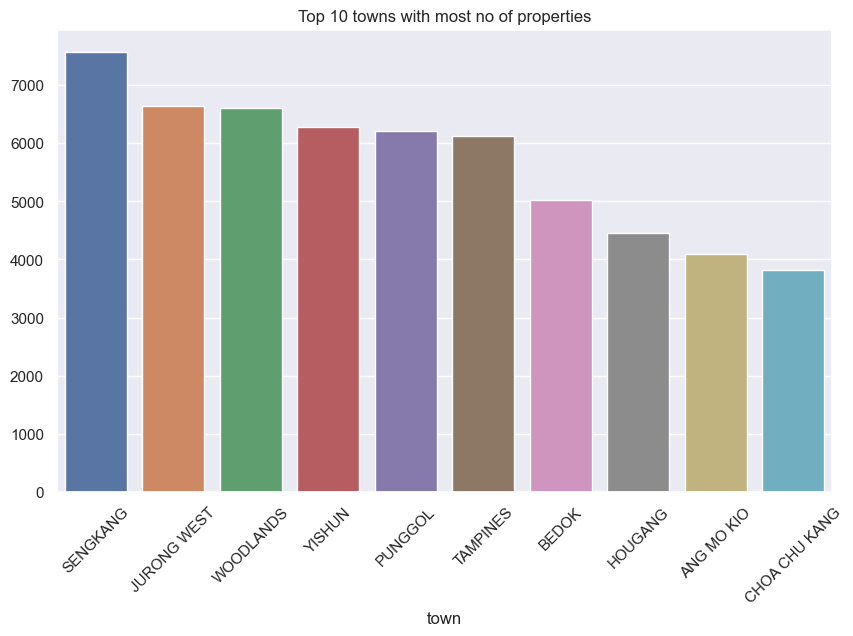

In [102]:
plt.figure(figsize=(10,6))
plt.title('Top 10 towns with most no of properties')
sns.barplot(x = df1.index,  y= df1.values)
plt.xticks(rotation=45)
plt.show()

# Year wise properties registered

In [86]:
df2 = df['year'].value_counts()
df3 = pd.DataFrame(df2) 
df4 = df3.sort_values(by = 'year')
df4

,count
year,
2017,20509
2018,21561
2019,22186
2020,23347
2021,4667


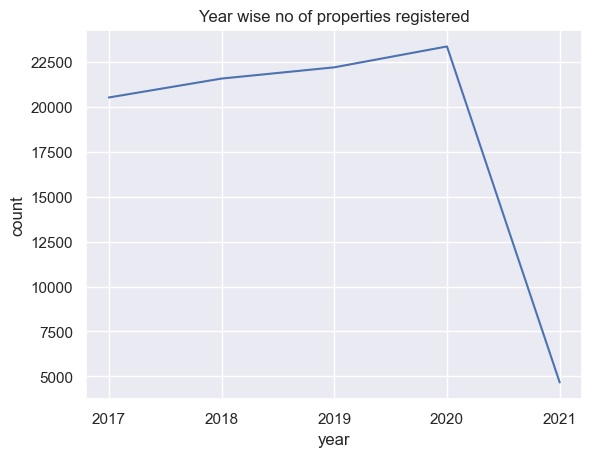

In [101]:
df4.index = df4.index.astype(str)
sns.lineplot(x='year', y='count',data=df4)
plt.title('Year wise no of properties registered')
plt.show()

# flat_type

In [97]:
df5 = df['flat_type'].value_counts().head(5)
df5

flat_type
4 ROOM       38182
5 ROOM       23176
3 ROOM       21980
EXECUTIVE     7438
2 ROOM        1408
Name: count, dtype: int64

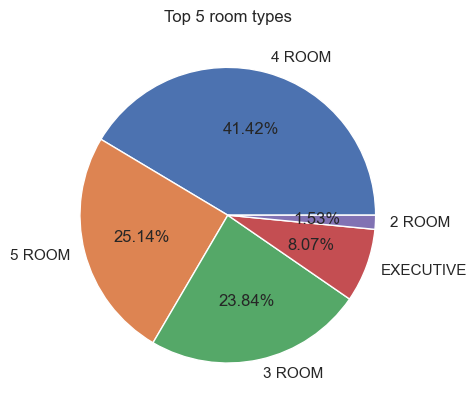

In [100]:
df5.plot(kind = 'pie', autopct = '%1.2f%%')
plt.title('Top 5 room types')
plt.ylabel(None)
plt.show()


# Flat model

In [107]:
df6 = df['flat_model'].value_counts().head(10)
df6

flat_model
Model A              30148
Improved             23109
New Generation       12454
Premium Apartment    10129
Apartment             3765
Simplified            3756
Maisonette            2786
Standard              2621
DBSS                  1613
Model A2              1146
Name: count, dtype: int64

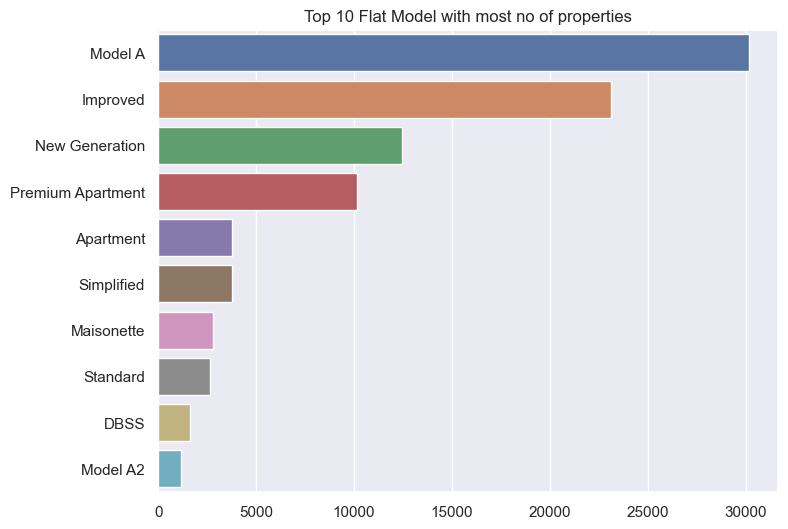

In [113]:
plt.figure(figsize=(8,6))
plt.title('Top 10 Flat Model with most no of properties')
sns.barplot(x = df6.values, y= df6.index)
plt.ylabel(None)
plt.show()

# Floor Area distribution

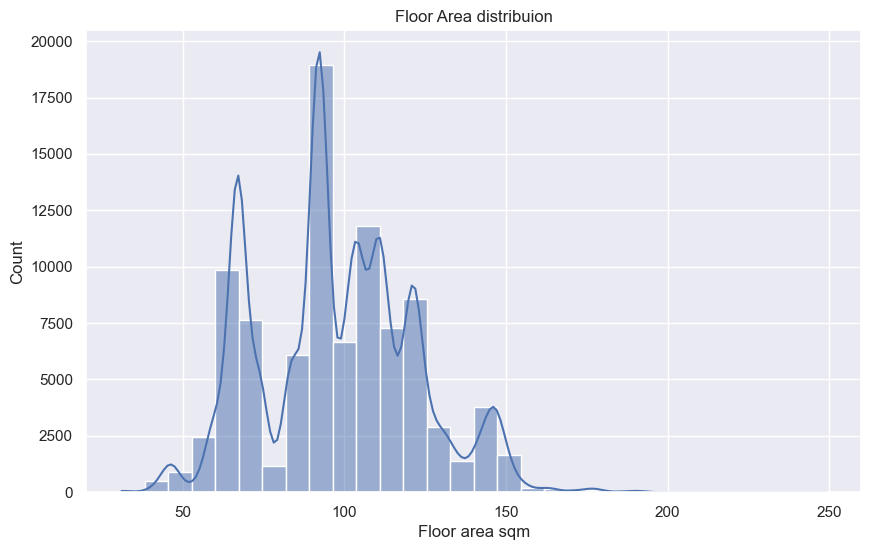

In [131]:
plt.figure(figsize=(10,6))
sns.histplot(x = 'floor_area_sqm', data = df, bins = 30, kde = True)
plt.title('Floor Area distribuion')
plt.xlabel('Floor area sqm')
plt.show()

# Average Resale Price yearwise

In [135]:
df7 = df.groupby('year')['resale_price'].mean()
df7

year
2017    443888.520571
2018    441282.063703
2019    432137.912902
2020    452230.645887
2021    489796.752466
Name: resale_price, dtype: float64

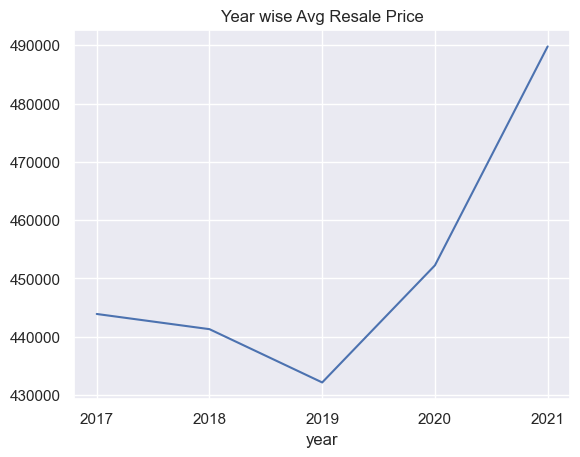

In [143]:
df7.index = df7.index.astype(str)
sns.lineplot(x=df7.index, y=df7.values)
plt.title('Year wise Avg Resale Price')
plt.show()

# Month wise sales

In [152]:
df8 = df.groupby('month_name')['resale_price'].sum()
df8

month_name
april     2.643701e+09
august    3.695582e+09
dec       3.319704e+09
feb       3.365650e+09
jan       3.692333e+09
july      3.900227e+09
jun       3.525260e+09
march     3.264552e+09
may       2.719100e+09
nov       3.609826e+09
oct       3.758972e+09
sep       3.554808e+09
Name: resale_price, dtype: float64

In [153]:
custom_sort_order = ['jan', 'feb', 'march', 'april', 'may','jun', 'july','august','sep', 'oct', 'nov','dec']

In [154]:
df8 = df8.reindex(custom_sort_order)

In [155]:
df8

month_name
jan       3.692333e+09
feb       3.365650e+09
march     3.264552e+09
april     2.643701e+09
may       2.719100e+09
jun       3.525260e+09
july      3.900227e+09
august    3.695582e+09
sep       3.554808e+09
oct       3.758972e+09
nov       3.609826e+09
dec       3.319704e+09
Name: resale_price, dtype: float64

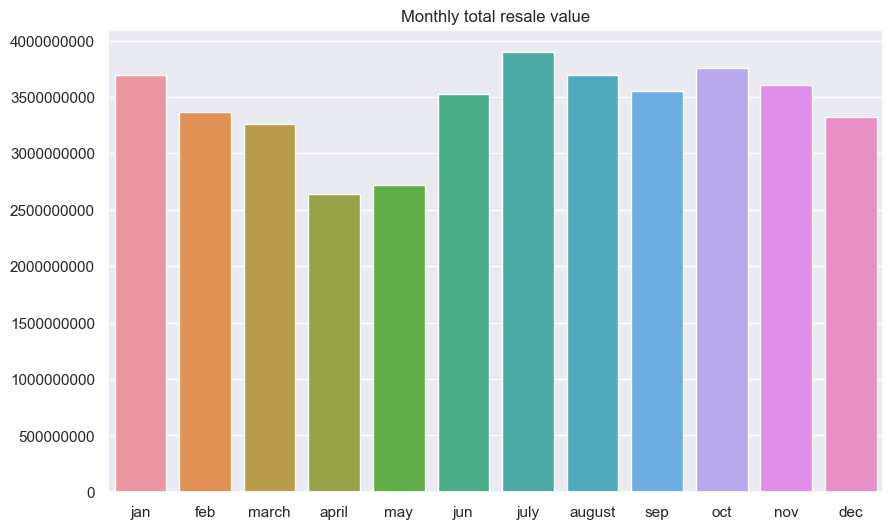

In [161]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x = df8.index, y = df8.values)
ax.ticklabel_format(style='plain', axis='y')
plt.title('Monthly total resale value')
plt.xlabel(None)
plt.show()

# Floor Area vs Resale Price

In [172]:
df9 = df.groupby('floor_area_sqm')['resale_price'].mean()
df9

floor_area_sqm
31.0     1.849111e+05
34.0     2.075000e+05
35.0     2.075000e+05
37.0     2.100000e+05
38.0     1.910000e+05
             ...     
190.0    7.500000e+05
192.0    7.545714e+05
215.0    8.726667e+05
237.0    1.185000e+06
249.0    1.053888e+06
Name: resale_price, Length: 162, dtype: float64

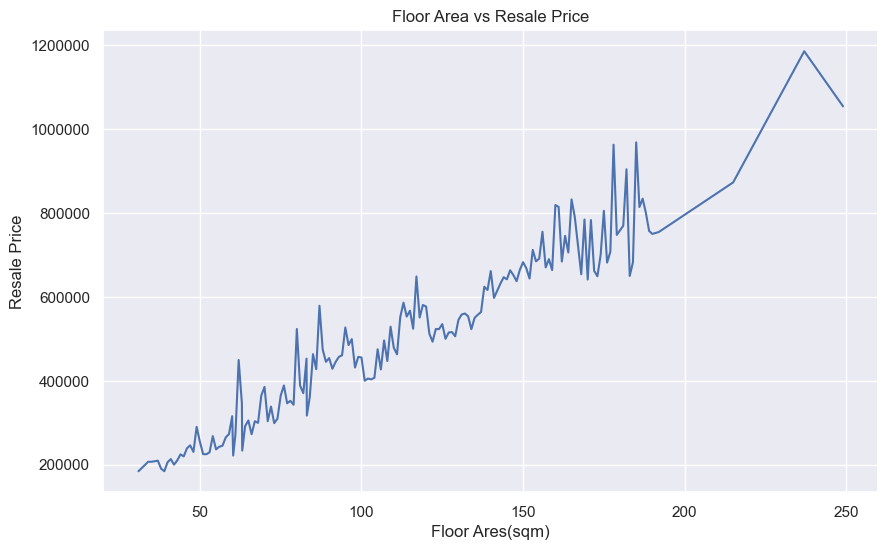

In [176]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x = df9.index, y = df9.values)
ax.ticklabel_format(style='plain', axis='y')
plt.title('Floor Area vs Resale Price')
plt.xlabel('Floor Ares(sqm)')
plt.ylabel('Resale Price')
plt.show()